# In the name of God

**Preface**

Do not utilize `print` due to its limitations. You should know different situations in the clients' systems. The module `logging` is a built-in library. 

By default, there are 5 standard levels indicating the severity of events. Each has a corresponding method that can be used to log events at that level of severity. The defined levels, in order of increasing severity, are the following:

 - DEBUG
 - INFO
 - WARNING
 - ERROR
 - CRITICAL

<font style="color: green;" />

## Log Levels

* **DEBUG**
    * To give information of the lines of codes
    * Useful when you want to find problems
* **INFO**
    * Confirm that things are working as expected
* **WARNING**
    * Indicates something unexpected happend. 
    * Indicative of some problem in the near future, e.g. disk space is low. 
    * **The software is still working as expected.** 
* **ERROR**
    * Due to a serious problem, the software has not been able to perform some function. 
* **CRITICAL**
    * A serious error has occurred. 
    * Indicates that the program itself may be unable to continue running. 

```python 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

logger.info('making a new dictionary')
d = {'Ribahs': 57, 'Ilya': 63}
logger.debug(f"{d} is created")

logger.info('Creation is over. ')
```

>```
INFO:__main__:making a new dictionary
INFO:__main__:Creation is over.
```

> “It is recommended that we use module-level loggers by passing \_\_name\_\_ as the *name* parameter to `getLogger()` to create a logger object as the name of the logger itself would tell us from where the events are being logged.”

```Python
logger = logging.getLogger(__name__)
```

 - **Logger** 
   - Exposes the interface that application code directly uses. 
   - This is the class whose objects will be used in the application code directly to call the functions.
   
 - **LogRecord**
   - Loggers automatically create LogRecord objects that have all the information related to the event being logged, like the name of the logger, the function, the line number, the message, and more.
   
 - **Handler** 
   - Sends the log records (created by loggers) to the appropriate destination, e.g a file or console. 
   
 - **Formatters**
   - Specifies the layout of log records in the final output. 

**Logger**

Logger objects have a threefold job. 
 - First, they expose several methods to application code so that applications can log messages at runtime. 
 - Second, logger objects determine which log messages to act upon based upon severity (the default filtering facility) or filter objects. 
 - Third, logger objects pass along relevant log messages to all interested log handlers.

The most widely used methods on logger objects fall into two categories: **configuration** and **message sending**.

These are the most common **configuration methods**:

 - `Logger.setLevel()` specifies the lowest-severity log message a logger will handle.

 - `Logger.addHandler()` and `Logger.removeHandler()` add and remove handler objects from the logger object. 

 - `Logger.addFilter()` and `Logger.removeFilter()` add and remove filter objects from the logger object. We are not going to cover them, because we have discussed about levels and how to add and remove handlers that relatively have a same procedure. 

You don’t need to always call these methods on every logger you create. 

With the logger object configured, the following methods create log **messages**:

`Logger.debug()`, `Logger.info()`, `Logger.warning()`, `Logger.error()`, and `Logger.critical()` all create log records with a message and a level that corresponds to their respective method names. 

`Logger.exception()` creates a log message similar to `Logger.error()`. The difference is that `Logger.exception()` dumps a stack trace along with it. Call this method only from an exception handler.

`Logger.log()` takes a log level as an explicit argument. This is a little more verbose for logging messages than using the log level convenience methods listed above, but this is how to log at custom log levels.

**Objects of the Logger class**
 
 - Logging is performed by calling methods on instances of the `Logger` class (hereafter called loggers). Each instance has a name, and they are conceptually arranged in a namespace hierarchy using dots (periods) as separators. For example, a logger named `‘scan’` is the parent of loggers `‘scan.text’`, `‘scan.html’` and `‘scan.pdf’`. Logger names can be anything you want, and they can indicate the area of an application in which a logged message originates.
 - Instantiated using the module-level function `logging.getLogger(name)`. 
 - Multiple calls to `getLogger()` with the same name will return a reference to the same Logger object, which saves us from passing the logger objects to every part where it’s needed. 
 - There is a default logger called *root* that can be accessed via `logging.getLogger()`, which is invoked without the *name* argument. 
 - Unlike the root logger, a custom logger can’t be configured using `basicConfig()`. 
   - Configure that with `Handlers` and `Formatters`.

By default, when a new logger is created, its parent will be set to the root logger:

```python
lab = logging.getLogger("a.b")
assert lab.parent == logging.root # lab's parent is indeed the root logger
```

As you might have guessed, loggers have a hierarchy. On top of the hierarchy is the root logger, which can be accessed via `logging.root`. This logger is called when methods like `logging.debug()` is used.

**Handlers**

Handler objects are responsible for dispatching the appropriate log messages (based on the log messages’ severity) to the handler’s specified destination. Logger objects can add zero or more handler objects to themselves with an `addHandler()` method. As an example scenario, an application may want to send all log messages to a log file, all log messages of error or higher to `stdout`, and all messages of critical to an email address. This scenario requires three individual handlers where each handler is responsible for sending messages of a specific severity to a specific location. The standard library includes quite a few handler types. Application code should not directly instantiate and use instances of `Handler`. Instead, the Handler class is a base class that defines the interface that all handlers should have and establishes some default behavior that child classes can use (or override).

It is, of course, possible to log messages to different destinations. Support is included in the package for writing log messages to files, HTTP GET/POST locations, email via SMTP, generic sockets, queues, or OS-specific logging mechanisms such as syslog or the Windows NT event log. Destinations are served by handler classes. You can create your own log destination class if you have special requirements not met by any of the built-in handler classes.

 - The root logger can have handlers.
 - Configure your own loggers and send the logs to multiple places when they are generated. 
   - Handlers send the log messages to configured destinations like the standard output stream or a file or over HTTP or to your email via SMTP.

One main advantage of logging to a file is that your application does not need to account for the possibility of encountering network-related errors while streaming logs to an external destination. If it runs into any issues with streaming logs over the network, you won’t lose access to those logs, since they’ll be stored locally on each server. Logging to a file also allows you to create a more customized logging setup, where you can route different types of logs to separate files, and tail and centralize those files with a log monitoring service.

**note**

A logger that you create can have more than one handler, which means you can set it up to be saved to a log file and also send it over email.
 - Like loggers, you can also set the severity level in handlers. 
   - This is useful if you want to set multiple handlers for the same logger but want different severity levels for each of them. 
     - For example, you may want logs with level WARNING and above to be logged to the console, but everything with level ERROR and above should also be saved to a file. 


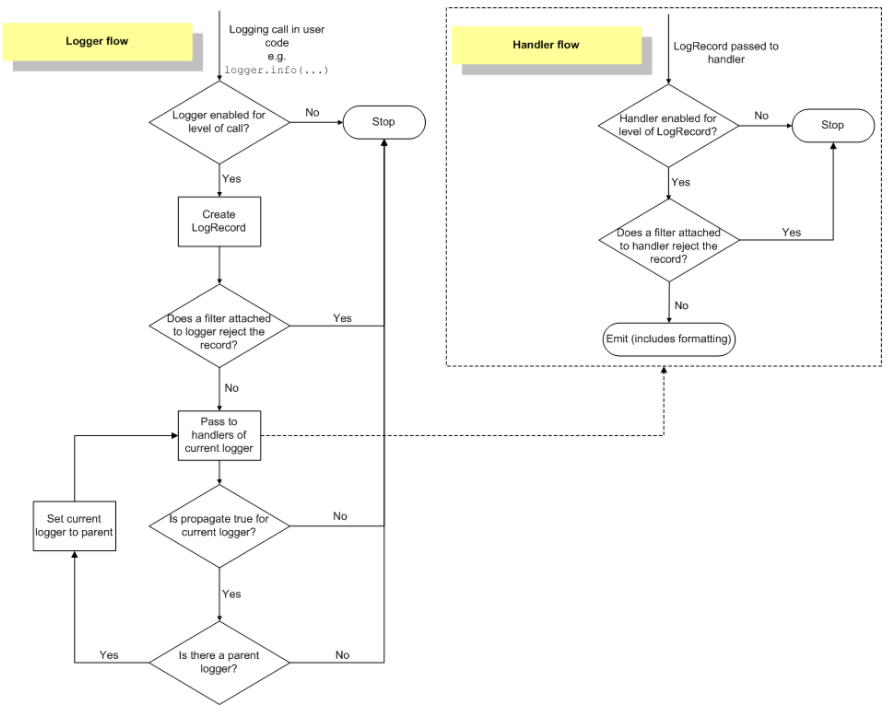

**Child loggers propagate messages up to the handlers associated with their ancestor loggers. Because of this, it is unnecessary to define and configure handlers for all the loggers an application uses. It is sufficient to configure handlers for a top-level logger and create child loggers as needed. (You can, however, turn off propagation by setting the propagate attribute of a logger to False.)**

<hr />

A good convention to use when naming loggers is to use a module-level logger, in each module which uses logging, named as follows:
```python
logger = logging.getLogger(__name__)
```

This means that logger names track the **package/module** hierarchy, and it’s intuitively obvious where events are logged just from the logger name.

**Configuations**

**basicConfig**

 - Performs basic configuration for the logging system by creating a StreamHandler with a default Formatter and adding it to the root logger. The functions debug(), info(), warning(), error() and critical() will call basicConfig() automatically if no handlers are defined for the root logger. 
 - This function does nothing if the root logger already has handlers configured, unless the keyword argument force is set to True.
 - Only the first call will actually do anything: subsequent calls are effectively no-ops.
 

The `basicConfig` method was one of the simple ways to have configuration. You can configure the logging module using functions like `fileConfig` or by making calls to the main API (defined in logging itself) and defining handlers which are declared either in `logging` or `logging.handlers`.

```python
import logging

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# create a file handler
handler = logging.FileHandler('hello.log')
handler.setLevel(logging.INFO)

# create a logging format
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# add the file handler to the logger
logger.addHandler(handler)

logger.info('Hello baby')
```

<hr />

```python
# logging_example.py
import logging

# Create a custom logger
logger = logging.getLogger(__name__)

# Create handlers
c_handler = logging.StreamHandler()
f_handler = logging.FileHandler('file.log')
c_handler.setLevel(logging.WARNING)
f_handler.setLevel(logging.ERROR)

# Create formatters and add it to handlers
c_format = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
f_format = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
c_handler.setFormatter(c_format)
f_handler.setFormatter(f_format)

# Add handlers to the logger
logger.addHandler(c_handler)
logger.addHandler(f_handler)

logger.warning('This is a warning')
logger.error('This is an error')
```

`basicConfig` will set the configuration for the root logger which in turn all loggers will use, unless otherwise specified.

`basicConfig` is a module level function. This function sets up the basic configuration for your logging system and should be called before anything else, because if you do any kind of logging before calling that yourself, functions like `debug()`, `info()`, etc. will call `basicConfig()` automatically if no handlers are defined for the root logger. 

This function is also **idempotent**, meaning once you call it once, you can call it a billion times after with no effect, **but this call will determine how your logging will work for all loggers not just the root (because all loggers are connected through hierarchies) and pass messages from one to another, unless you specify explicit configuration for descendant loggers.**

Handlers are attached to loggers and formatters are attached to handlers. You can set these up one time per your entire application via `basicConfig` or `dictConfig` or `fileConfig` or you can set these up individually, per logger.

```python
import logging

root = logging.getLogger()
print(root.handlers)  # no handlers at this point
logging.warning('hello')  # calls basicConfig
print(root.handlers)  # has handler now

# create file handler
fh = logging.FileHandler('spam.log')
fh.setLevel(logging.ERROR)

# create formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)

# add the handlers to the logger
root.addHandler(fh)

print(root.handlers)  # now has 2 handlers
root.warning('whats good')  # will only show to console
root.error('whats good')  # will show to console and file

random_logger = logging.getLogger('bogus')  # another logger, descendant from root
random_logger.warning('im random')  # will use root handlers, meaning it will show to console
random_logger.error('im random error')  # same as above, both console and file

# and you can ofc add handlers and what not differently to this non root logger
```

**Use rotating file handler**

If you use `FileHandler` for writing logs, the size of the log file will grow with time. Someday, it will occupy all of your disk space. To avoid that situation, you should use `RotatingFileHandler` instead of `FileHandler` in the production environment.

**Configuration file format** 

The configuration file format understood by `fileConfig()` is based on `configparser` functionality. The file must contain sections called `[loggers]`, `[handlers]` and `[formatters]` which identify by name the entities of each type which are defined in the file. For each such entity, there is a separate section which identifies how that entity is configured. Thus, for a logger named `log01` in the `[loggers]` section, the relevant configuration details are held in a section `[logger_log01]`. Similarly, a handler called `hand01` in the `[handlers]` section will have its configuration held in a section called `[handler_hand01]`, while a formatter called `form01` in the `[formatters]` section will have its configuration specified in a section called `[formatter_form01]`. The root logger configuration must be specified in a section called `[logger_root]`.

**Config file**

logging.ini:

```
[loggers]
keys=root

[handlers]
keys=consoleHandler

[formatters]
keys=simpleFormatter

[logger_root]
level=DEBUG
handlers=consoleHandler

[handler_consoleHandler]
class=StreamHandler
level=DEBUG
formatter=simpleFormatter
args=(sys.stdout,)

[formatter_simpleFormatter]
format=%(asctime)s - %(name)s - %(levelname)s - %(message)s
datefmt=
```

Python’s logging documentation recommends that you should only attach each handler to one logger and rely on propagation to apply handlers to the appropriate child loggers. 

This means that if you have a default logging configuration that you want all of your loggers to pick up, you should add it to a parent logger (such as the root logger), rather than applying it to each lower-level logger. 

**Logging from Multiple Modules**

```python
# myapp.py
import logging
import mylib

def main():
    logging.basicConfig(filename='myapp.log', level=logging.INFO)
    logging.info('Started')
    mylib.do_something()
    logging.info('Finished')

if __name__ == '__main__':
    main()
```

<hr />

```python
# mylib.py
import logging

def do_something():
    logging.info('Doing something')
```

**Do not get logger at the module level unless disable_existing_loggers is False**

my_module.py:

```python

import logging

logger = logging.getLogger(__name__)

def foo():
    logger.info('Hi, foo')

class Bar(object):
    def bar(self):
        logger.info('Hi, bar')
```

main.py

```python
import logging

# load my module
import my_module

# load the logging configuration
logging.config.fileConfig('logging.ini')

my_module.foo()
bar = my_module.Bar()
bar.bar()
```

You create the logger at the module level, and you then import the module before loading the logging configuration from a file. The `logging.fileConfig` function’s default behavior is to disable existing loggers when they are called. So, those setting in the file will not be applied to your logger in `my_module.py`. It’s better to get the logger when you need it to avoid the pitfall. It’s cheap to create or get a logger. You can write the code like this:

```python
import logging

def foo():
    logger = logging.getLogger(__name__)
    logger.info('Hi, foo')

class Bar(object):
    def __init__(self, logger=None):
        self.logger = logger or logging.getLogger(__name__)

    def bar(self):
        self.logger.info('Hi, bar')
```

By doing that, the loggers will be created after you load the configuration. Now the setting will be applied correctly.

Other than avoiding create logger at the module level, since Python 2.7, a new argument `disable_existing_loggers` was added to the `logging.fileConfig` function. By setting it to False, the problem mentioned above can be solved.

Setting `disable_existing_loggers` to `True` will disable any non-root loggers that existed prior to `fileConfig()` unless you configure them afterward. 

 - Logging is a Python module.
 - `basicConfig` & `getLogger` are module level functions.
 - `debug()`, `info()`, `warning()`, etc. are both module level functions and class methods, depending on how you call them. If you do `logging.debug(msg`) you're calling a module level function, if you do `some_logger.debug(msg)` you're calling a method. The module level function itself also calls the root method under the hood.

The root logger is automatically created when you import the `logging` machinery, i.e when you do `import logging` - the root logger is automatically created which, in turn, enables you to do straightforward calls such as `logging.debug()`, which use that root logger.

Basically, a module level function looks like this:

```python
def debug(msg, *args, **kwargs):
    """
    Log a message with severity 'DEBUG' on the root logger. If the logger has
    no handlers, call basicConfig() to add a console handler with a pre-defined
    format.
    """
    if len(root.handlers) == 0:
        basicConfig()
    root.debug(msg, *args, **kwargs)
```

Loggers are organized in hierarchies, and all loggers are descendants of the root logger.

When you do a call to `getLogger(name)` if the name exists, it will return that logger, if it doesn't, it will create that logger. The `getLogger(name)` function is **idempotent**, meaning, for subsequent calls with the same name it will just return that existing logger no matter how many times you call it.

The name is potentially a period-separated hierarchical value, like `foo.bar.baz`. Loggers that are further down in the hierarchical list are children of loggers higher up in the list. For example, given a logger with a name of `foo`, loggers with names of `foo.bar`, `foo.bar.baz`, and `foo.bam` are all descendants of `foo`.

When a logger is created, the level is set to `NOTSET`. Loggers have a concept of **effective level**. If a level is not explicitly set on a logger, the level of its parent is used instead as its effective level. If the parent has no explicit level set, its parent is examined, and so on - all ancestors are searched until an explicitly set level is found. The root logger always has an explicit level set (WARNING by default). When deciding whether to process an event, the effective level of the logger is used to determine whether the event is passed to the logger’s handlers.

**Formatting the Strings**

The contents of log messages can be configured. 

```python
format='%(process)d-%(levelname)s-%(message)s'
```

The attributes of [LogRecord](https://docs.python.org/3/library/logging.html#logrecord-attributes).
- LogRecord instances are created automatically by the Logger every time something is logged.

**Capture Stack Traces in an Application**

```Python
except Exception as e:
    logging.error("The message is here", exc_info=True)

except Exception as e:
    logging.exception("The message is here")

```

`logging.exception`
 - Logs a message with level ERROR and adds exception information to the message.
 - Should only be called from an exception handler

**Basic Configurations**
 - [basicConfig](https://docs.python.org/3/library/logging.html#logging.basicConfig)

Breaks PEP8 styleguide and uses camelCase naming conventions. 

 * level: The root logger will be set to the specified severity level.
 * filename: This specifies the file.
 * filemode: If filename is given, the file is opened in this mode. The default is a, which means append.
 * format: This is the format of the log message.

By using the level parameter, you can set what level of log messages you want to record. This can be done by passing one of the constants available in the class, and this would enable all logging calls at or above that level to be logged. 

**It should be noted that calling basicConfig() to configure the root logger works only if the root logger has not been configured before. Basically, this function can only be called once.**

Functions like `error` also call basicConfig() without arguments automatically if it has not been called before. This means that after the first time this function is called, you can no longer configure the root logger because it would have called the **basicConfig()** function internally.

**JSON Format**

As your systems generate more logs over time, it can quickly become challenging to locate the logs that can help you troubleshoot specific issues—especially when those logs are distributed across multiple servers, services, and files. If you centralize your logs with a log management solution, you’ll always know where to look whenever you need to search and analyze your logs, rather than manually logging into each application server.

Logging in JSON is a best practice when centralizing your logs with a log management service, because machines can easily parse and analyze this standard, structured format. JSON format is also easily customizable to include any attributes you decide to add to each log format, so you won’t need to update your log processing pipelines every time you add or remove an attribute from your log format.

The Python community has developed various libraries that can help you convert your logs into JSON format. For this example, we’ll be using `python-json-logger` to convert log records into JSON.

First, install it in your environment:

```
pip install python-json-logger
```

```
[loggers]
keys=root

[handlers]
keys=consoleHandler,fileHandler

[formatters]
keys=simpleFormatter, json

[logger_root]
level=DEBUG
handlers=consoleHandler, fileHandler

[handler_consoleHandler]
class=StreamHandler
level=DEBUG
formatter=simpleFormatter
args=(sys.stdout,)

[handler_fileHandler]
class=FileHandler
level=DEBUG
formatter=json
args=("file.log",)

[formatter_json]
class=pythonjsonlogger.jsonlogger.JsonFormatter
format=%(asctime)s %(name)s %(levelname)s %(message)s

[formatter_simpleFormatter]
format=%(asctime)s %(name)s - %(levelname)s:%(message)s

```

*A sample output:*
```
{"asctime": "2021-09-19 21:35:27,455", "name": "__main__", "levelname": "INFO", "message": "inside find_result function."}
{"asctime": "2021-09-19 21:35:27,455", "name": "first", "levelname": "INFO", "message": "5 and 20 are added. res is 25."}
{"asctime": "2021-09-19 21:35:27,455", "name": "__main__", "levelname": "INFO", "message": "The final outcome is found."}
{"asctime": "2021-09-19 21:35:27,456", "name": "__main__", "levelname": "INFO", "message": "inside find_result function."}
{"asctime": "2021-09-19 21:35:27,456", "name": "first", "levelname": "ERROR", "message": "Input a is 0, and it is illegal.", "exc_info": "Traceback (most recent call last):\n  File \"H:\\Mine\\python_coding\\coding_classes\\code_quality\\04. logging\\toy\\first.py\", line 14, in addition\n    raise Exception(\"An exception has occurred.\")\nException: An exception has occurred."}
{"asctime": "2021-09-19 21:35:27,457", "name": "__main__", "levelname": "INFO", "message": "The final outcome is found."}
```

If you’re not using file-based configuration, you will need to import the `python-json-logger` library in your application code, and define a handler and formatter, as described in the documentation:

```python
from pythonjsonlogger import jsonlogger

logger = logging.getLogger()

logHandler = logging.StreamHandler()
formatter = jsonlogger.JsonFormatter()
logHandler.setFormatter(formatter)
logger.addHandler(logHandler)
```

To see why JSON format is preferable, particularly when it comes to more complex or detailed log records, let’s return to the example of the multi-line exception traceback we logged earlier. It looked something like this:

>   
    2019-03-27 21:01:58,191 lowermodule - ERROR:[Errno 2] No such file or directory: 'nonexistentfile.txt'
    Traceback (most recent call last):
      File "/home/emily/logstest/lowermodule.py", line 14, in word_count
        with open(myfile, 'r') as f:
    FileNotFoundError: [Errno 2] No such file or directory: 'nonexistentfile.txt'
    

Although this exception traceback log is easy to read in a file or in the console, if it gets processed by a log management platform, each line may show up as a separate log (unless you configure multiline aggregation rules), which can make it difficult to reconstruct exactly what happened.

Now that we’re logging this exception traceback in JSON, the application will generate a single log that looks like this:

> {"asctime": "2019-03-28 17:44:40,202", "name": "lowermodule", "levelname": "ERROR", "message": "[Errno 2] No such file or directory: 'nonexistentfile.txt'", "exc_info": "Traceback (most recent call last):\n  File \"/home/emily/logstest/lowermodule.py\", line 19, in word_count\n    with open(myfile, 'r') as f:\nFileNotFoundError: [Errno 2] No such file or directory: 'nonexistentfile.txt'"}

A logging service can easily interpret this JSON log and display the full traceback information (including the exc_info attribute) in an easy-to-read format:

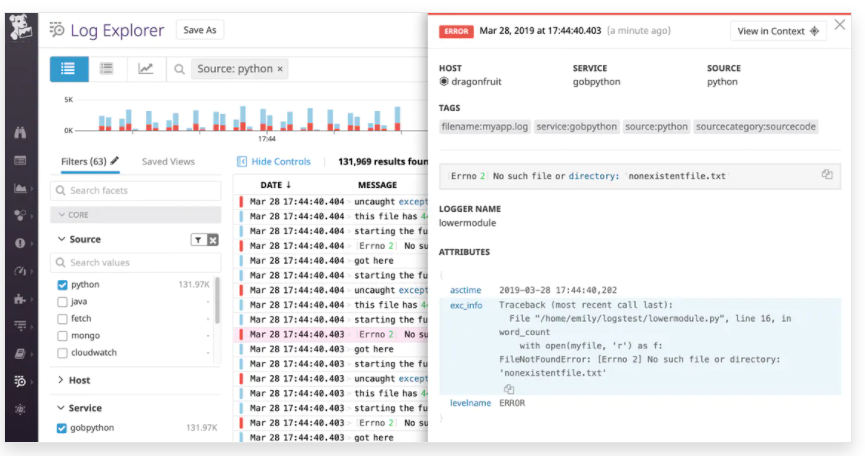

Here are the best practices for using this module:

Configure the root logger but never use it in your code—e.g., never call a function like `logging.info()`, which actually calls the root logger behind the scene. If you want to catch error messages from libraries you use, make sure to configure the root logger to write to a file, for example, to make the debugging easier. By default, the root logger only outputs to `stderr`, so the log can get lost easily.
To use the logging, make sure to create a new logger by using `logging.getLogger(__name__)`. To add more handlers, you can have a method that returns a logger.

```python
import logging
import sys
from logging.handlers import TimedRotatingFileHandler
FORMATTER = logging.Formatter("%(asctime)s — %(name)s — %(levelname)s — %(message)s")
LOG_FILE = "my_app.log"

def get_console_handler():
   console_handler = logging.StreamHandler(sys.stdout)
   console_handler.setFormatter(FORMATTER)
   return console_handler
def get_file_handler():
   file_handler = TimedRotatingFileHandler(LOG_FILE, when='midnight')
   file_handler.setFormatter(FORMATTER)
   return file_handler
def get_logger(logger_name):
   logger = logging.getLogger(logger_name)
   logger.setLevel(logging.DEBUG) # better to have too much log than not enough
   logger.addHandler(get_console_handler())
   logger.addHandler(get_file_handler())
   # with this pattern, it's rarely necessary to propagate the error up to parent
   logger.propagate = False
   return logger
```

Then, you can create a new logger and use it:

```python
# my_logger = get_logger("my module name")
my_logger = get_logger(__name__)
my_logger.debug("a debug message")
```

Use `RotatingFileHandler` classes, such as the `TimedRotatingFileHandler` used in the example instead of `FileHandler`, as it will rotate the file for you automatically when the file reaches a size limit or do it everyday. 

Resources:

 - [Python Docs](https://docs.python.org/3/library/logging.html)
 - [Real Python](https://realpython.com/python-logging/#classes-and-functions)
 - [Coralogix](https://coralogix.com/blog/python-logging-best-practices-tips/)
 - [Fangpenlin](https://fangpenlin.com/posts/2012/08/26/good-logging-practice-in-python/) 
 - [Logging Config](https://docs.python.org/3/library/logging.config.html)
 - [Can basicConfig only be used on root logger and handlers/formatter only be used on namedloggers?](https://stackoverflow.com/questions/57797876/can-basicconfig-only-be-used-on-root-logger-and-handlers-formatter-only-be-used)
 - [datadoghq](https://www.datadoghq.com/blog/python-logging-best-practices/#digging-deeper-into-pythons-logging-library)
 
Want to study more?

 - [Logging Cookbook](https://docs.python.org/3/howto/logging-cookbook.html#logging-cookbook)